In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# reading test data set.
test_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv'
test_df = pd.read_csv(test_url)
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [3]:
# reading train dataset.
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Exploratory Data Analysis

In [4]:
# size of dataset.
df.shape

(31647, 18)

##### This dataset contains 31647 rows and 18 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [5]:
# list of columns.
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
# dropping unnecessary columns.
df.drop(['ID', 'age', 'marital'], axis=1, inplace=True)
test_df.drop(['ID', 'age', 'marital'], axis=1, inplace=True)

In [7]:
df

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,admin.,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,unknown,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,services,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,management,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,technician,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,management,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,management,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,technician,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [8]:
# getting unique values.
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [9]:
# replacing admin. with admin
df['job'].replace('admin.', 'admin', inplace=True)

In [10]:
df

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,admin,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,unknown,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,services,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,management,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,technician,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,management,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,management,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,management,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,technician,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [12]:
# getting unique values.
df['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [13]:
# getting unique values.
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
# finding null values.
df.isna().sum()

job           0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
# finding unknow values with will be considered as null.
(df == 'unknown').sum()

job             206
education      1314
default           0
balance           0
housing           0
loan              0
contact        9177
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome      25929
subscribed        0
dtype: int64

In [16]:
# Columns to replace 'unknown' with NaN
columns_to_replace = ['job', 'education', 'contact', 'poutcome']

# Loop through columns and replace 'unknown' with NaN
for col in columns_to_replace:
    df[col] = df[col].replace('unknown', np.nan)

In [17]:
# checking again.
(df == 'unknown').sum()

job           0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
# Fill NaN values with mode for each column that has NaN values
for col in df.columns:
    if df[col].isnull().any():  # Check if column has NaN values
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [19]:
# checking again
df.isna().sum()

job           0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [20]:
# getting information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         31647 non-null  object
 1   education   31647 non-null  object
 2   default     31647 non-null  object
 3   balance     31647 non-null  int64 
 4   housing     31647 non-null  object
 5   loan        31647 non-null  object
 6   contact     31647 non-null  object
 7   day         31647 non-null  int64 
 8   month       31647 non-null  object
 9   duration    31647 non-null  int64 
 10  campaign    31647 non-null  int64 
 11  pdays       31647 non-null  int64 
 12  previous    31647 non-null  int64 
 13  poutcome    31647 non-null  object
 14  subscribed  31647 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


<Axes: >

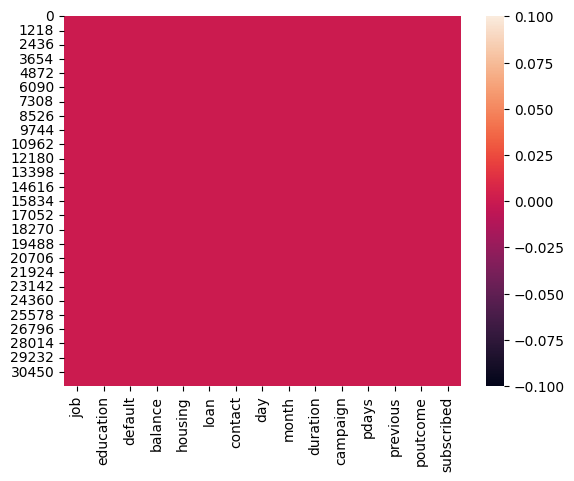

In [21]:
# representation of non null values with heatmap.
sns.heatmap(df.isnull())

In [22]:
df.head(10)

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,admin,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,failure,no
1,blue-collar,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,failure,no
2,services,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,failure,no
3,management,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,technician,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,failure,no
5,management,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,failure,no
6,retired,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,failure,yes
7,technician,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,failure,no
8,blue-collar,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,failure,no
9,admin,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,failure,no


In [23]:
# getting unique values.
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

subscribed
no     27932
yes     3715
Name: count, dtype: int64

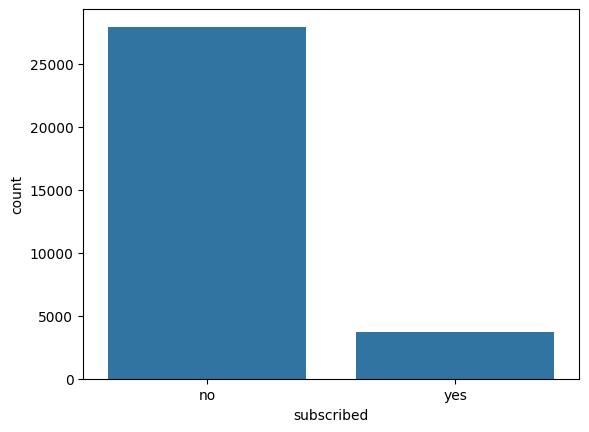

In [24]:
# checking the imbalance class of target.
ax = sns.countplot(x= 'subscribed', data=df)
df['subscribed'].value_counts()

In [25]:
# As we can see, there is a significant difference between 'no' and 'yes', indicating a 
# class imbalance that can be addressed using oversampling methods.

In [26]:
# getting information.
df.describe()

,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### The count shows the total number of rows without null values. We can observe that the mean is greater than the median (50%), which indicates skewness in the data. Additionally, there is a significant gap between the 75th percentile and the maximum, suggesting the presence of outliers in the dataset.

#### Checking outliers

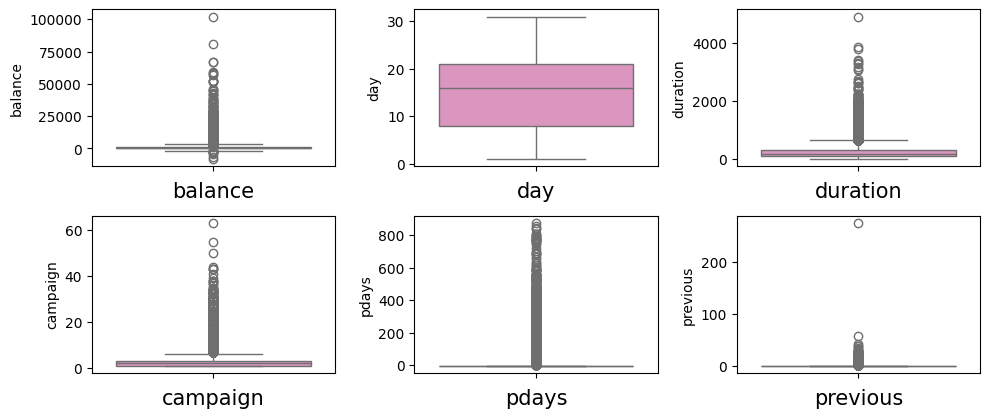

In [27]:
numeric_df = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in numeric_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [28]:
# We can clearling see the outliers are present in this data set 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         31647 non-null  object
 1   education   31647 non-null  object
 2   default     31647 non-null  object
 3   balance     31647 non-null  int64 
 4   housing     31647 non-null  object
 5   loan        31647 non-null  object
 6   contact     31647 non-null  object
 7   day         31647 non-null  int64 
 8   month       31647 non-null  object
 9   duration    31647 non-null  int64 
 10  campaign    31647 non-null  int64 
 11  pdays       31647 non-null  int64 
 12  previous    31647 non-null  int64 
 13  poutcome    31647 non-null  object
 14  subscribed  31647 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


In [30]:
# Encoding categorial columns using OrdinalEncodes
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.0,1.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,0.0,0.0
1,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,0.0,0.0
2,7.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,0.0,0.0
3,4.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,9.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,0.0,0.0
31643,4.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,0.0,1.0
31644,4.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,0.0,0.0
31645,9.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [32]:
# getting skewness.
df.skew()

job            0.269635
education     -0.151918
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        3.539849
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome       3.858154
subscribed     2.377445
dtype: float64

In [33]:
# Skewness is present in this data. The values we need to configure are greater than -0.5 or +0.5.

### Checking visualization presentation

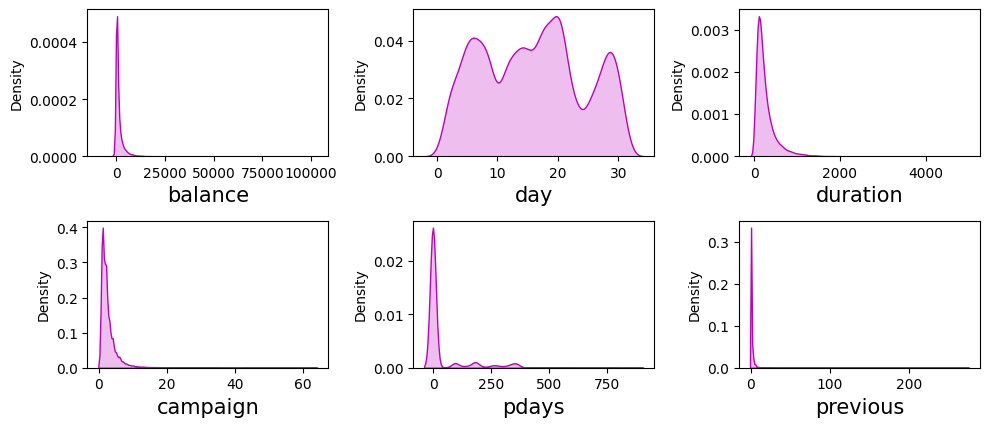

In [35]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in numeric_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [36]:
# Removing the skewness by using Cube root square.
for col in numeric_df:
    df[col] = np.cbrt(df[col])

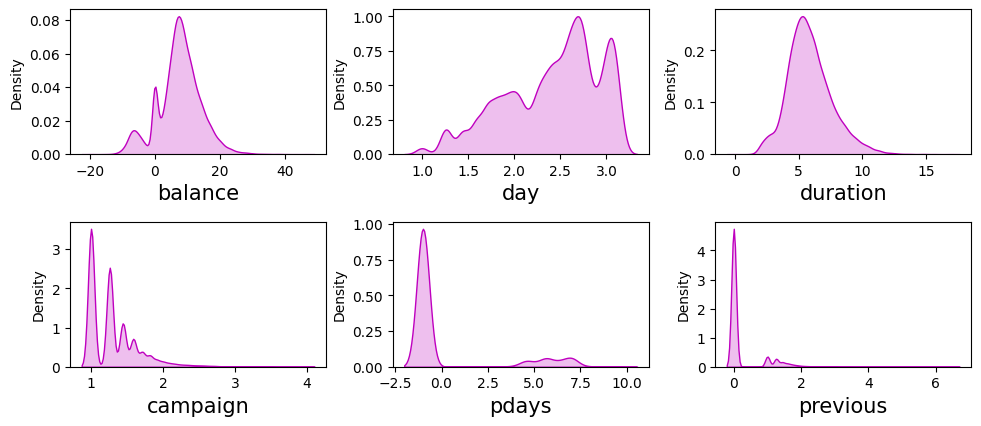

In [37]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in numeric_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [38]:
# again checking the skewness.
df.skew()

job           0.269635
education    -0.151918
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       3.539849
day          -0.586331
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome      3.858154
subscribed    2.377445
dtype: float64

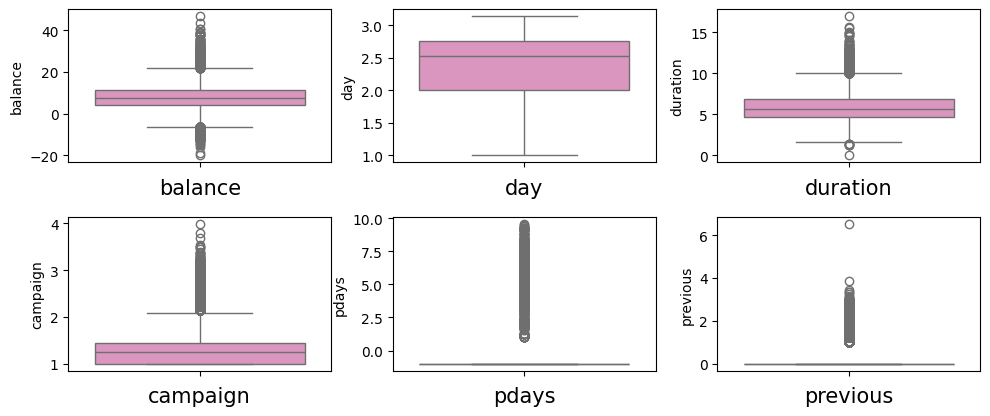

In [41]:
# checking outliers
numeric_df = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in numeric_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [42]:
# Removing outliers
from scipy import stats

for col in numeric_df:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df = df[filtered_entries]

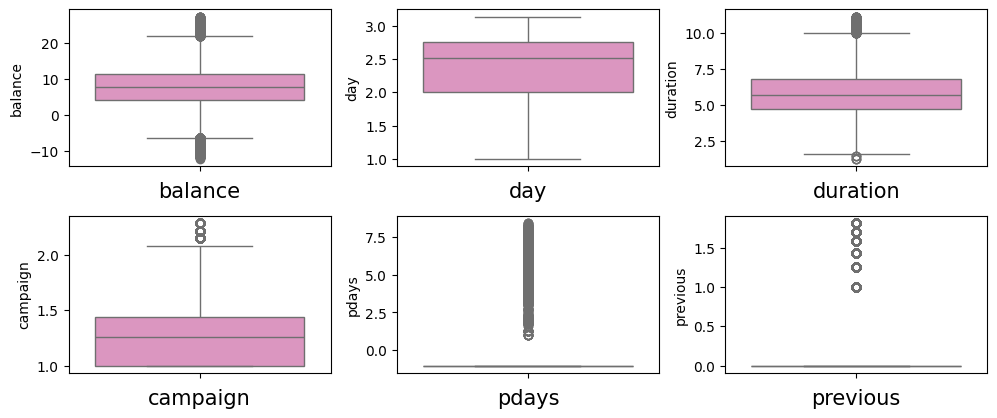

In [43]:
# after removing the outliers.
numeric_df = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in numeric_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [44]:
# checking again.
df.describe()

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000
mean,4.262866,1.138476,0.018173,7.363310,0.555467,0.162397,0.062627,2.406943,5.546264,5.843125,1.277425,0.159925,0.215165,0.099704,0.112828
std,3.240079,0.651593,0.133580,6.416154,0.496922,0.368821,0.242294,0.508945,2.999459,1.648599,0.294339,2.610649,0.487538,0.392119,0.316387
min,0.000000,0.000000,0.000000,-12.284851,0.000000,0.000000,0.000000,1.000000,0.000000,1.259921,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.160168,0.000000,0.000000,0.000000,2.000000,3.000000,4.717694,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,7.628884,1.000000,0.000000,0.000000,2.519842,6.000000,5.656653,1.259921,-1.000000,0.000000,0.000000,0.000000
75%,7.000000,2.000000,0.000000,11.200191,1.000000,0.000000,0.000000,2.758924,8.000000,6.818462,1.442250,-1.000000,0.000000,0.000000,0.000000
max,10.000000,2.000000,1.000000,27.228513,1.000000,1.000000,1.000000,3.141381,11.000000,11.106405,2.289428,8.372967,1.817121,2.000000,1.000000


In [45]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
job,1.000000,0.186634,-0.006278,0.026030,-0.107529,-0.030441,-0.008740,0.011242,-0.088203,-0.001854,0.005554,-0.004925,0.003345,0.018205,0.036893
education,0.186634,1.000000,-0.008683,0.067983,-0.080672,-0.021550,-0.071558,0.009742,-0.073419,0.006368,-0.005038,0.028015,0.040280,0.052461,0.072320
default,-0.006278,-0.008683,1.000000,-0.198383,-0.012433,0.079690,-0.016688,0.003875,0.005572,-0.005030,0.012107,-0.036481,-0.039028,-0.026982,-0.017072
balance,0.026030,0.067983,-0.198383,1.000000,-0.081860,-0.141530,0.050073,-0.003744,-0.004101,0.030806,-0.023581,0.059088,0.069559,0.069400,0.095977
housing,-0.107529,-0.080672,-0.012433,-0.081860,1.000000,0.035872,-0.084180,-0.003092,0.273222,0.005779,-0.043807,0.078613,0.049534,-0.067686,-0.145259
loan,-0.030441,-0.021550,0.079690,-0.141530,0.035872,1.000000,-0.017519,0.011344,0.025374,-0.007105,0.001413,-0.024384,-0.026187,-0.050164,-0.072179
contact,-0.008740,-0.071558,-0.016688,0.050073,-0.084180,-0.017519,1.000000,0.013130,-0.004513,-0.063211,0.063309,0.016354,0.020663,0.019254,0.011407
day,0.011242,0.009742,0.003875,-0.003744,-0.003092,0.011344,0.013130,1.000000,0.031977,-0.033129,0.128179,-0.070158,-0.067768,-0.034665,-0.031321
month,-0.088203,-0.073419,0.005572,-0.004101,0.273222,0.025374,-0.004513,0.031977,1.000000,-0.000596,-0.129800,0.020920,0.024281,0.004962,-0.031373
duration,-0.001854,0.006368,-0.005030,0.030806,0.005779,-0.007105,-0.063211,-0.033129,-0.000596,1.000000,-0.094082,0.021163,0.022895,0.054044,0.364980


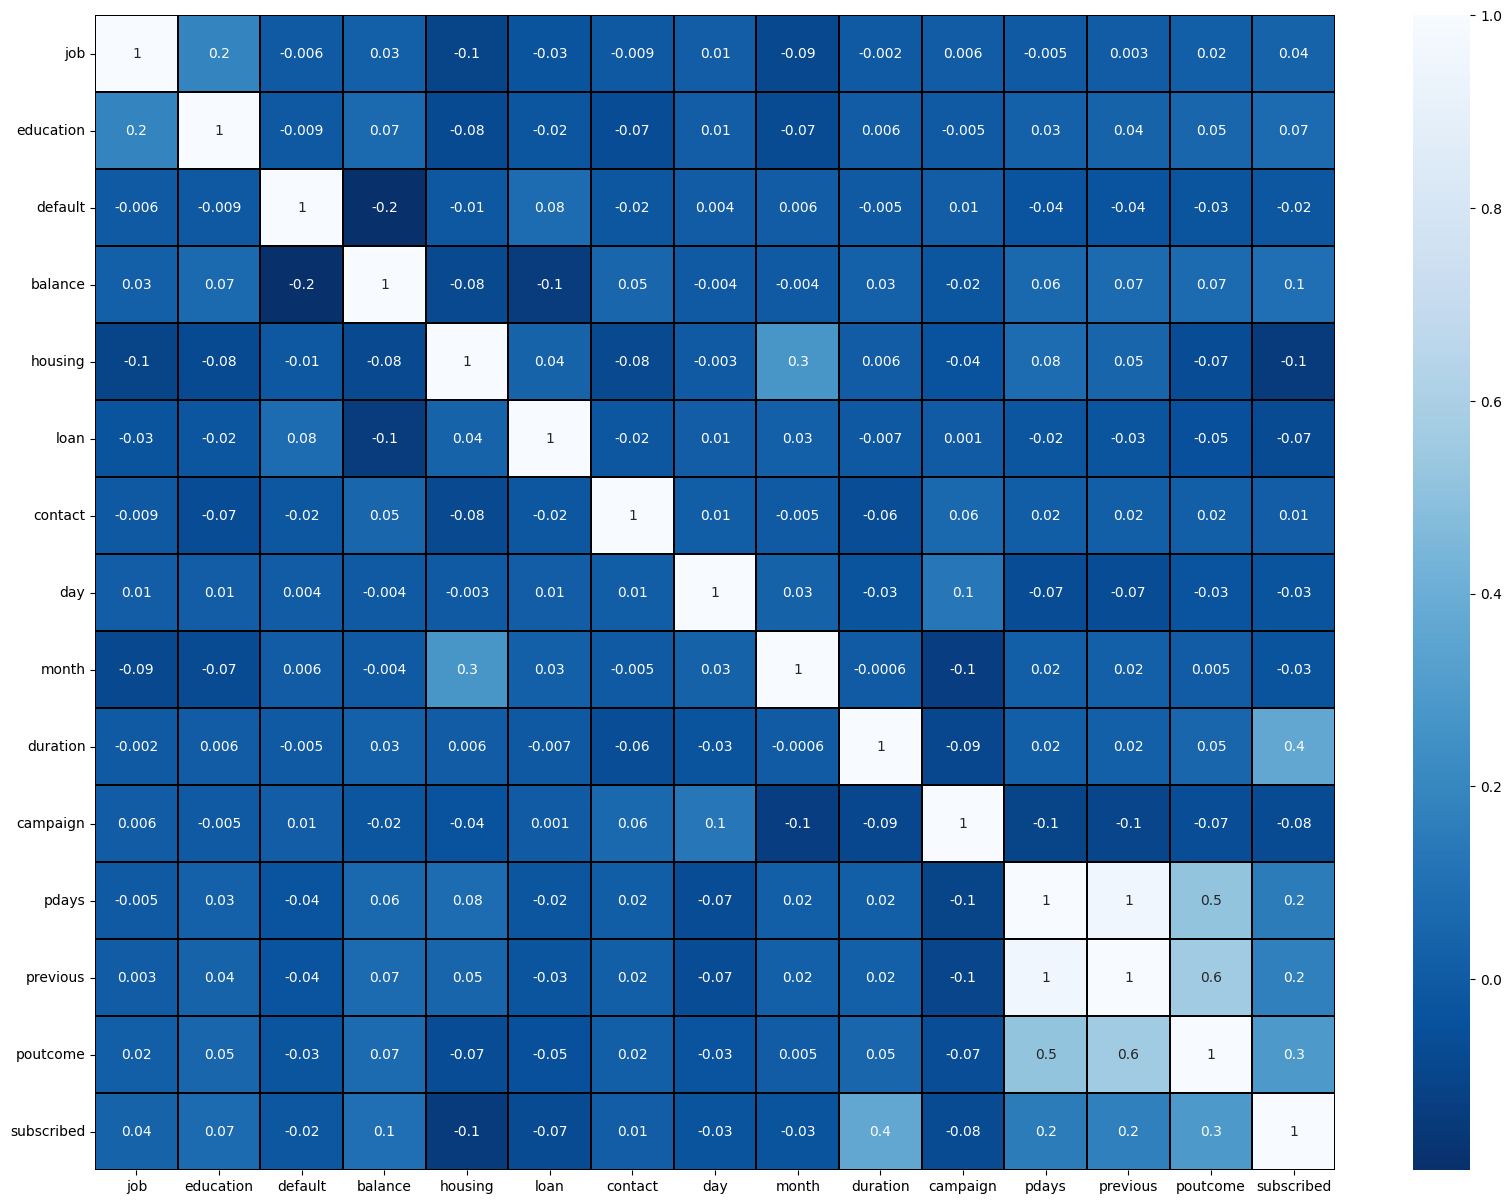

In [46]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

#### When two independent features are highly correlated, we can drop one of the columns.

In [47]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.364980
poutcome      0.290949
previous      0.170562
pdays         0.150428
balance       0.095977
education     0.072320
job           0.036893
contact       0.011407
default      -0.017072
day          -0.031321
month        -0.031373
loan         -0.072179
campaign     -0.076156
housing      -0.145259
Name: subscribed, dtype: float64

In [49]:
# Separating feature and label
x = df.drop('subscribed', axis=1)
y = df['subscribed']

In [50]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [51]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [52]:
vif
# So, we can clearly see that there is multicollinearity present, so we need to drop one columns which is heigly responsible.

,VIF Values,Feature Values
0,1.049332,job
1,1.055920,education
2,1.045795,default
3,1.078205,balance
4,1.137245,housing
5,1.026767,loan
6,1.024894,contact
7,1.023629,day
8,1.110813,month
9,1.016536,duration


In [53]:
# droping previous column because it is causing the higly correlation.
df.drop('previous', axis=1, inplace=True)
test_df.drop('previous', axis=1, inplace=True)

In [54]:
# Now checking again
# Separating feature and label
x = df.drop('subscribed', axis=1)
y = df['subscribed']

In [55]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [56]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature Values'] = x.columns

In [57]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feature Values
0,1.049159,job
1,1.054933,education
2,1.045729,default
3,1.077493,balance
4,1.133099,housing
5,1.026700,loan
6,1.024796,contact
7,1.023599,day
8,1.109268,month
9,1.016527,duration


In [58]:
# Now we can move to the model building
y.value_counts()

subscribed
0.0    26703
1.0     3396
Name: count, dtype: int64

In [59]:
# We can see that there is class imbalance in the target values, so we need to address it by using an oversampling method.

### OverSampling

In [60]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x,y)

In [61]:
# Checking again
y.value_counts()

subscribed
0.0    26703
1.0     3396
Name: count, dtype: int64

In [62]:
# We have resolved the class imbalance issue by using oversampling method.
y1.value_counts()

subscribed
0.0    26703
1.0    26703
Name: count, dtype: int64

### Modelling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.9456372487829234 at random_state  77


In [64]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=.30, random_state=maxRs)

In [65]:
# Classification Algorithmfrom 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [66]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [67]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  94.45762077143927
[[7442  616]
 [ 272 7692]]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      8058
         1.0       0.93      0.97      0.95      7964

    accuracy                           0.94     16022
   macro avg       0.95      0.94      0.94     16022
weighted avg       0.95      0.94      0.94     16022



# ExtraTreesClassifier

In [68]:
# Checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predET)*100)

print(confusion_matrix(y_test, predET))

print(classification_report(y_test, predET))

Accuracy of this model  95.37510922481587
[[7476  582]
 [ 159 7805]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      8058
         1.0       0.93      0.98      0.95      7964

    accuracy                           0.95     16022
   macro avg       0.95      0.95      0.95     16022
weighted avg       0.96      0.95      0.95     16022



# GradientBoostingClassifier

In [69]:
# Checking accuracy for GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predGBC)*100)

print(confusion_matrix(y_test, predGBC))

print(classification_report(y_test, predGBC))

Accuracy of this model  91.18711771314443
[[7211  847]
 [ 565 7399]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      8058
         1.0       0.90      0.93      0.91      7964

    accuracy                           0.91     16022
   macro avg       0.91      0.91      0.91     16022
weighted avg       0.91      0.91      0.91     16022



# BaggingClassifier

In [70]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predBC)*100)

print(confusion_matrix(y_test, predBC))

print(classification_report(y_test, predBC))

Accuracy of this model  92.7724378978904
[[7420  638]
 [ 520 7444]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      8058
         1.0       0.92      0.93      0.93      7964

    accuracy                           0.93     16022
   macro avg       0.93      0.93      0.93     16022
weighted avg       0.93      0.93      0.93     16022



# LogisticRegression

In [71]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predLR)*100)

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

Accuracy of this model  81.63150667831731
[[6535 1523]
 [1420 6544]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      8058
         1.0       0.81      0.82      0.82      7964

    accuracy                           0.82     16022
   macro avg       0.82      0.82      0.82     16022
weighted avg       0.82      0.82      0.82     16022



# SVC

In [72]:
# Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)

print("Accuracy of this model ", accuracy_score(y_test, predSV)*100)

print(confusion_matrix(y_test, predSV))

print(classification_report(y_test, predSV))

Accuracy of this model  84.87704406441144
[[6460 1598]
 [ 825 7139]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      8058
         1.0       0.82      0.90      0.85      7964

    accuracy                           0.85     16022
   macro avg       0.85      0.85      0.85     16022
weighted avg       0.85      0.85      0.85     16022



In [73]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.90516757 0.95365602 0.95290703 0.95468589 0.95168992]
0.9436212870036211


0.000954920710771523

In [74]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(ET, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predET) - score.mean()

[0.94879236 0.9589926  0.95917985 0.95992885 0.95861811]
0.9571023538552387


-0.0033512616070798806

In [75]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(GBC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predGBC) - score.mean()

[0.84057293 0.91789158 0.91395937 0.92051306 0.91751709]
0.9020908047387619


0.009780372392682368

In [76]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(BC, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predBC) - score.mean()

[0.87202771 0.94279562 0.94288924 0.94317012 0.93905065]
0.9279866673961209


-0.00026228841721687157

In [77]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(LR, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predLR) - score.mean()

[0.80518629 0.81144088 0.80750866 0.81621571 0.80713416]
0.8094971409737907


0.006817925809382452

In [78]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(SV, x1, y1)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predSV) - score.mean()

[0.83795169 0.84617545 0.84308585 0.85235465 0.85001404]
0.8459163383261036


0.002854102318010754

In [93]:
# Encoding categorial columns using OrdinalEncodes
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = OE.fit_transform(test_df[i].values.reshape(-1,1))

In [95]:
# Predict on the test data
test_predictions = ET.predict(test_df)

# Create a DataFrame for the predictions
output = test_df.copy()
output['subscribed'] = test_predictions
output['subscribed'] = output['subscribed'].map({1: 'yes', 0: 'no'})

# Save the predictions to a CSV file
output.to_csv('term_deposit_predictions.csv', index=False)